In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [4]:
att=pd.read_csv(r"D:\data set\Attrition.csv")

In [5]:
att.shape

(1470, 35)

In [6]:
#att.isnull().sum()

In [7]:
att.columns[att.dtypes=='object']

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [8]:
att.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [9]:
att.Attrition.replace({'No':0,'Yes':1},inplace=True)
att.BusinessTravel.replace({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2},inplace=True)
att.Department.replace({'Research & Development':0,'Sales':1,'Human Resources':2},inplace=True)
att.EducationField.replace({'Life Sciences':0,'Medical':1,'Marketing':2,'Technical Degree':3,'Other':4,'Human Resources':5},inplace=True)
att.Gender.replace({'Male':0,'Female':1},inplace=True)
att.OverTime.replace({'No':0,'Yes':1},inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
att[att.columns[att.dtypes=='object']]=att[att.columns[att.dtypes=='object']].apply(le.fit_transform)

In [12]:
#att.columns[att.dtypes=='object']

# Descision tree

In [13]:
from sklearn.model_selection import train_test_split
att_train,att_test=train_test_split(att,test_size=0.20)

In [14]:
att_train.Attrition.value_counts()

0    985
1    191
Name: Attrition, dtype: int64

In [15]:
df1=att_train[att_train.Attrition==1]

In [16]:
att_train=pd.concat([att_train,df1,df1,df1,df1])

In [17]:
att_train.Attrition.value_counts()

0    985
1    955
Name: Attrition, dtype: int64

In [18]:
att_train_x = att_train.drop(['Attrition'],axis=1)
att_train_y =att_train.iloc[:,1]

In [19]:
att_test_x = att_test.drop(['Attrition'],axis=1)
att_test_y =att_test.iloc[:,1]

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_att=DecisionTreeClassifier()

In [21]:
search_grid={'max_depth':(3,4,5,6),
             'criterion':('gini','entropy'),
            'min_samples_split':(25,50,75,100)}

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
grid_att=GridSearchCV(dt_att,param_grid=search_grid)
#grid_att

In [24]:
grid_att.fit(att_train_x,att_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (3, 4, 5, 6),
                         'min_samples_split': (25, 50, 75, 100)})

In [25]:
grid_att.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 25}

In [26]:
dt_att=DecisionTreeClassifier(criterion='gini',min_samples_split=25,max_depth=6,class_weight='balanced')

In [27]:
dt_att.fit(att_train_x,att_train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=25)

In [28]:
pred_att_test=dt_att.predict(att_test_x)
#pred_att_test

In [29]:
#pred_att_grid=grid_att.predict(att_test_x)
#pred_att_grid

In [30]:
from sklearn.metrics import confusion_matrix
tab_dt_att=confusion_matrix(att_test_y,pred_att_test)
tab_dt_att

array([[200,  48],
       [ 27,  19]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(att_test_y,pred_att_test)

0.7448979591836735

In [32]:
from sklearn.metrics import recall_score
recall_score(att_test_y,pred_att_test)

0.41304347826086957

In [33]:
from sklearn.metrics import precision_score
precision_score(att_test_y,pred_att_test)

0.2835820895522388

In [34]:
from six import StringIO
import matplotlib.pyplot as plt
import pydotplus
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz


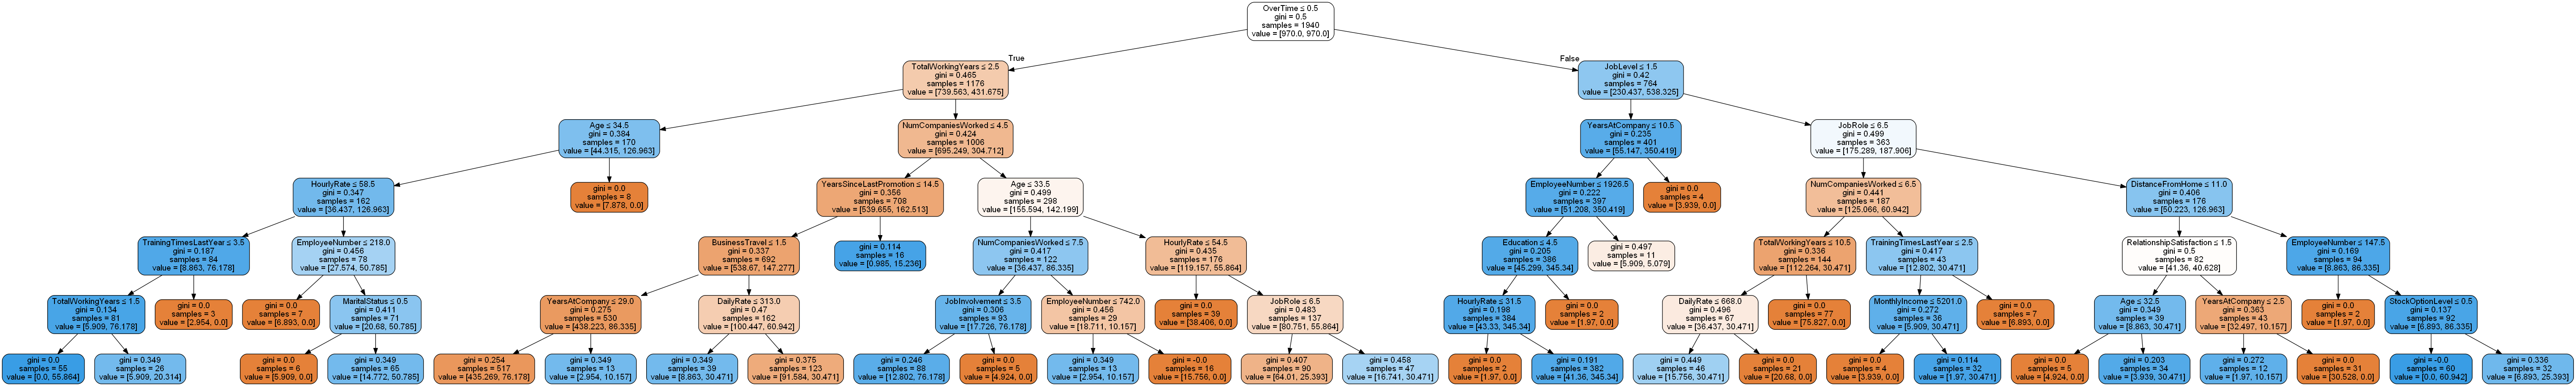

<Figure size 864x864 with 0 Axes>

In [35]:
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,12))
dot_data = StringIO()
export_graphviz(dt_att, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=att_train_x.columns )
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Logistic Regression

In [36]:
from sklearn.model_selection import train_test_split
att_train,att_test=train_test_split(att,test_size=0.20)

In [37]:
att_train.Attrition.value_counts()

0    987
1    189
Name: Attrition, dtype: int64

In [38]:
df1=att_train[att_train.Attrition==1]

In [39]:
att_train=pd.concat([att_train,df1,df1,df1,df1])

In [40]:
att_train.Attrition.value_counts()

0    987
1    945
Name: Attrition, dtype: int64

In [41]:
att_train_x = att_train.drop(['Attrition'],axis=1)
att_train_y =att_train.iloc[:,1]

In [42]:
att_test_x = att_test.drop(['Attrition'],axis=1)
att_test_y =att_test.iloc[:,1]

In [43]:
from sklearn.linear_model import LogisticRegression
lonreg=LogisticRegression(class_weight='balanced')

In [44]:
lonreg.fit(att_train_x,att_train_y)

C:\Users\Priti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [45]:
pred=lonreg.predict(att_test_x)

In [46]:
tab_att_log=confusion_matrix(att_test_y,pred)
tab_att_log

array([[150,  96],
       [ 15,  33]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(att_test_y,pred)*100

62.244897959183675

In [48]:
from sklearn.metrics import recall_score
recall_score(att_test_y,pred)

0.6875

In [49]:
from sklearn.metrics import precision_score
precision_score(att_test_y,pred)

0.2558139534883721

# random forest 

In [50]:
from sklearn.model_selection import train_test_split
att_train,att_test=train_test_split(att,test_size=0.20)

In [51]:
att_train.Attrition.value_counts()

0    989
1    187
Name: Attrition, dtype: int64

In [52]:
df1=att_train[att_train.Attrition==1]

In [53]:
att_train=pd.concat([att_train,df1,df1,df1,df1])

In [54]:
att_train.Attrition.value_counts()

0    989
1    935
Name: Attrition, dtype: int64

In [55]:
att_train_x = att_train.drop(['Attrition'],axis=1)
att_train_y =att_train.iloc[:,1]

In [56]:
att_test_x = att_test.drop(['Attrition'],axis=1)
att_test_y =att_test.iloc[:,1]

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=350,criterion='entropy',class_weight='balanced')

In [58]:
rfc.fit(att_train_x,att_train_y)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=350)

In [59]:
pred_rfc_att=rfc.predict(att_test_x)

In [60]:
tab_rfc_att=confusion_matrix(att_test_y,pred_rfc_att)
tab_rfc_att

array([[234,  10],
       [ 39,  11]], dtype=int64)

In [61]:
rfc.feature_importances_

array([0.05313569, 0.01728647, 0.05449834, 0.01325775, 0.04471821,
       0.01881458, 0.01971322, 0.        , 0.05721311, 0.02529319,
       0.00853263, 0.04698868, 0.02099417, 0.02418779, 0.03069278,
       0.02657832, 0.02318989, 0.08060279, 0.04527558, 0.03299367,
       0.        , 0.05420286, 0.0332196 , 0.00502697, 0.02342697,
       0.        , 0.03483553, 0.04283476, 0.02311699, 0.01761365,
       0.0377035 , 0.02826785, 0.02345147, 0.032333  ])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(att_test_y,pred_rfc_att)

0.8333333333333334

In [63]:
from sklearn.metrics import recall_score
recall_score(att_test_y,pred_rfc_att)

0.22

In [64]:
from sklearn.metrics import precision_score
precision_score(att_test_y,pred_rfc_att)

0.5238095238095238

# Ada Boost

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [66]:
dt=DecisionTreeClassifier(class_weight='balanced',criterion='entropy')
Adaboost=AdaBoostClassifier(dt)

In [67]:
Adaboost.fit(att_train_x,att_train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy'))

In [68]:
att_pred_boost=Adaboost.predict(att_test_x)

In [69]:

tab_adaboost=confusion_matrix(att_test_y,att_pred_boost)
tab_adaboost

array([[207,  37],
       [ 36,  14]], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(att_test_y,att_pred_boost)

0.7517006802721088

In [71]:
from sklearn.metrics import recall_score
recall_score(att_test_y,att_pred_boost)

0.28

In [72]:
from sklearn.metrics import precision_score
precision_score(att_test_y,att_pred_boost)

0.27450980392156865

# Gradientbooster

In [73]:
from sklearn.model_selection import train_test_split
att_train,att_test=train_test_split(att,test_size=0.20)

In [74]:
att_train.Attrition.value_counts()

0    985
1    191
Name: Attrition, dtype: int64

In [75]:
df1=att_train[att_train.Attrition==1]

In [76]:
att_train=pd.concat([att_train,df1,df1,df1,df1,df1,df1,df1])

In [77]:
att_train.Attrition.value_counts()

1    1528
0     985
Name: Attrition, dtype: int64

In [78]:
att_train_x = att_train.drop(['Attrition'],axis=1)
att_train_y =att_train.iloc[:,1]

In [79]:
att_test_x = att_test.drop(['Attrition'],axis=1)
att_test_y =att_test.iloc[:,1]

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()

In [81]:
model.fit(att_train_x,att_train_y)

GradientBoostingClassifier()

In [82]:
model_pred=model.predict(att_test_x)

In [83]:
model_tab=confusion_matrix(att_test_y,model_pred)
model_tab

array([[201,  47],
       [ 12,  34]], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(att_test_y,model_pred)

0.7993197278911565

In [85]:
from sklearn.metrics import recall_score
recall_score(att_test_y,model_pred)

0.7391304347826086

In [86]:
from sklearn.metrics import precision_score
precision_score(att_test_y,model_pred)

0.41975308641975306

# Naive Bayes Classifier

In [87]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()

In [88]:
mb.fit(att_train_x,att_train_y)

MultinomialNB()

In [89]:
pred_mb=mb.predict(att_test_x)

In [90]:
tab_mb=confusion_matrix(att_test_y,pred_mb)
tab_mb

array([[120, 128],
       [ 17,  29]], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(att_test_y,pred_mb)

0.5068027210884354

In [92]:
from sklearn.metrics import recall_score
recall_score(att_test_y,pred_mb)

0.6304347826086957

In [93]:
from sklearn.metrics import precision_score
precision_score(att_test_y,pred_mb)

0.18471337579617833

# Knn Classifier

In [94]:
from sklearn.model_selection import train_test_split
att_train,att_test=train_test_split(att,test_size=0.20)

In [95]:
att_train.Attrition.value_counts()

0    981
1    195
Name: Attrition, dtype: int64

In [96]:
#df1=att_train[att_train.Attrition==1]

In [97]:
#att_train=pd.concat([att_train,df1,df1,df1,df1])

In [98]:
att_train.Attrition.value_counts()

0    981
1    195
Name: Attrition, dtype: int64

In [99]:
att_train_x = att_train.drop(['Attrition'],axis=1)
att_train_y =att_train.iloc[:,1]

In [100]:
att_test_x = att_test.drop(['Attrition'],axis=1)
att_test_y =att_test.iloc[:,1]

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [102]:
knn.fit(att_train_x,att_train_y)

KNeighborsClassifier()

In [103]:
pred_knn=knn.predict(att_test_x)

In [104]:
tab_att_knn=confusion_matrix(att_test_y,pred_knn)
tab_att_knn

array([[238,  14],
       [ 38,   4]], dtype=int64)

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(att_test_y,pred_knn)

0.8231292517006803

In [106]:
from sklearn.metrics import recall_score
recall_score(att_test_y,pred_knn)

0.09523809523809523

In [107]:
from sklearn.metrics import precision_score
precision_score(att_test_y,pred_knn)

0.2222222222222222

In [108]:
from sklearn.metrics import classification_report
print(classification_report(att_test_y,pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       252
           1       0.22      0.10      0.13        42

    accuracy                           0.82       294
   macro avg       0.54      0.52      0.52       294
weighted avg       0.77      0.82      0.79       294



In [109]:
accuracy=[]
for i in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(att_train_x,att_train_y)
    pred_knn=knn.predict(att_test_x)
    tab_knn=confusion_matrix(att_test_y,pred_knn)
    acc=sum(tab_knn.diagonal())/tab_knn.sum()
    accuracy.append(acc)
#accuracy

In [110]:
rangelist=list(range(1,40))
type(rangelist)
df0=pd.DataFrame({'kvalue':rangelist,'Accuracy':accuracy})
df0.head()


,kvalue,Accuracy
0,1,0.772109
1,2,0.829932
2,3,0.802721
3,4,0.840136
4,5,0.823129


In [114]:
df0.sort_values('Accuracy',ascending=False).head()

,kvalue,Accuracy
19,20,0.857143
29,30,0.857143
22,23,0.857143
23,24,0.857143
24,25,0.857143


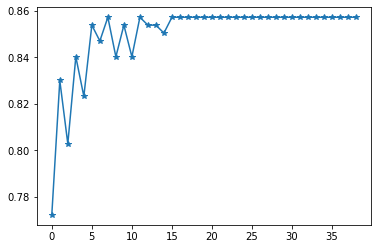

In [115]:
plt.plot(accuracy,marker='*')

[]

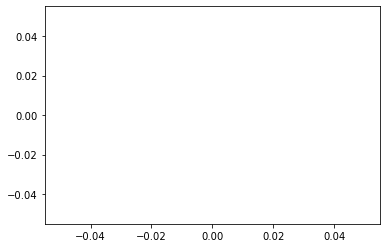

In [113]:
plt.plot()